无监督算法：不使用目标，而是用学习数据的某种属性，以某种方式表示特征的结构。在用于预测的特征工程中，可以将无监督算法视为特征发现技术

聚类：根据数据点彼此的相似程度将数据点分配给组。聚类算法使"物以类聚"

# 聚类标签作为功能

单个实值特征：聚类的作用类似传统的"分箱"或"离散化"处理；多个实值特征：类似于"多维分箱"(有时称为矢量量化)

功能Cluster是分类的：添加聚类标签的动机是，聚类会将特征之间的复杂关系分解为简单的块，从而使我们的模型可以一个接一个地学习更简单的块，而不是一次学习所有复杂的整体。

# K-Means聚类

K-Mean聚类使用普通直线距离来度量相似性，通过在空间中放置多个点(称为质心)来创建聚类。数据集中的每个点都被指定给它最接近的质心的聚类。K-Means中的K是它创建的质心的数量。

可以想象每个质心通过一系列的辐射圈来捕捉点，当来自竞争质心的圆集合重叠时，便形成了一条线，其结果就是所谓的Voronoi tessallation(镶嵌，细分)。细分显示了数据集将要分配什么给聚类；细分本质上是K-Mean从训练数据中学习的内容。

K-Mean算法如何学习聚类：一.随机初始化一些预定义数量的质心(n_clusters)；二.循环访问以下操作：1.将点分配给最近的聚类质心，2.移动每个质心最小化其到点的距离；三.遍历这两个步骤，知道质心不再移动，或达到最大迭代次数(max_iter);四.质心的初始随机位置较差，为此，算法重复多次(n_init),返回在每个点与其质心之间具有最小总距离的聚类，即为最佳聚类

# 示例

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [8]:
#由于 K-Means 聚类对小数位数敏感，因此最好使用极值重新缩放或归一化数据

kmeans=KMeans(n_clusters=6,n_init=10)
#创建6个簇，运行次数为10
X["Cluster"]=kmeans.fit_predict(X)
#使用fit_predict()方法完成拟合与预测
X["Cluster"]=X["Cluster"].astype("category")
#将该列转化为分类数据类型

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,3
1,8.3014,37.86,-122.22,3
2,7.2574,37.85,-122.24,3
3,5.6431,37.85,-122.25,3
4,3.8462,37.85,-122.25,1


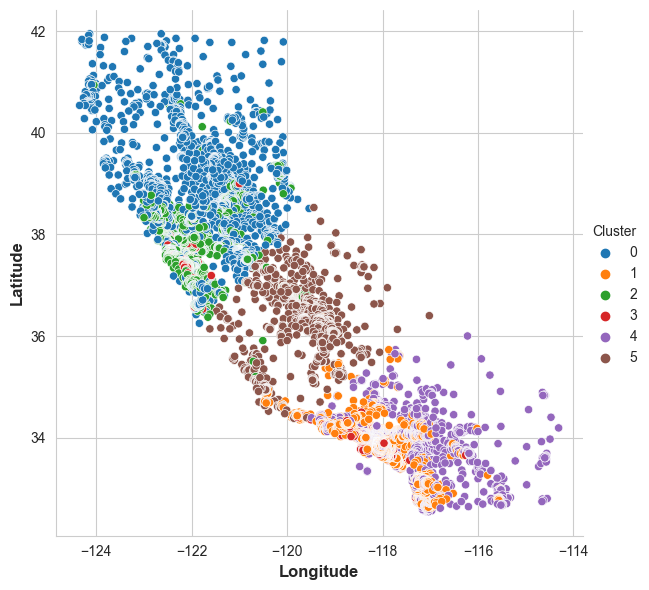

In [5]:
sns.relplot(x="Longitude",y="Latitude",hue="Cluster",data=X,height=6)
relplot()创建关系图

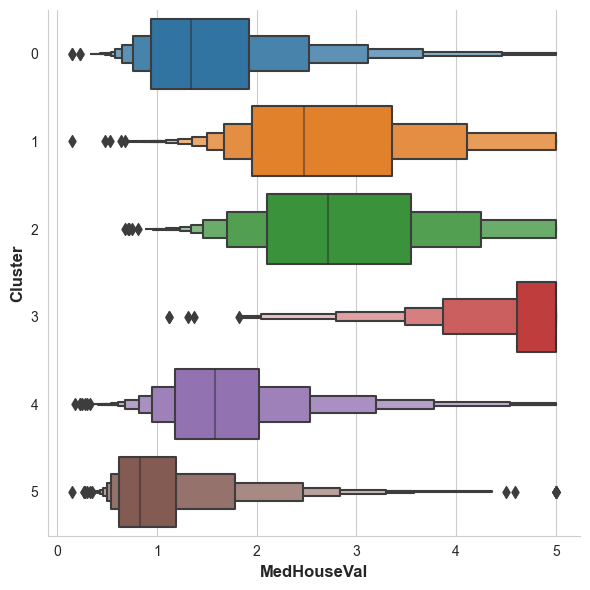

In [6]:
X["MedHouseVal"]=df["MedHouseVal"]

sns.catplot(x="MedHouseVal",y="Cluster",data=X,kind="boxen",height=6)
#catplot()创建分类图，boxen为盒图